In [16]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import resize

# Image Directory

In [17]:
image_dir = ".\\CatHead"
images = os.listdir(image_dir)
print(len(images))

160


# Resize and gray scale conversion of the images

In [18]:
def image_conversion(image_dir):
    conversion_images = []
    images = os.listdir(image_dir)
    for img in images:
        input_img = mpimg.imread(os.path.join(image_dir, img))
        input_img = resize(input_img,(8, 8, 3),anti_aliasing=True)
        gray_img = rgb2gray(input_img)
    
        if gray_img is not None:
            conversion_images.append(gray_img)
            
    return conversion_images


# Mean Normalize the image and create a hash table with hash value is equal to sum of the normalize image vector



In [19]:
def generate_hash_key(conversion_images):
    hash_keys = []
    hash_data = {}
    for i,image in enumerate(conversion_images):
        img_vec = image.reshape(8*8)
        mean_val = np.mean(img_vec)
        std_val = np.std(img_vec)
        hash_key = np.sum(np.where(((img_vec-mean_val)/std_val) > 0.5,1,0))
        if hash_key in hash_data.keys():
            hash_data[hash_key].append(i)
        else:
            hash_data[hash_key]= [i]
            
    return  hash_data

# Display the hash table

In [20]:
import pandas as pd
img_list = image_conversion(image_dir)
hash_table = generate_hash_key(img_list)
col_names = ['hash code','image index']
hash_table = pd.DataFrame(hash_table.items(), columns = col_names)
hash_table.head(10)

,hash code,image index
0,23,"[0, 3, 10, 12, 42, 43, 52, 57, 70, 74, 80, 91,..."
1,15,"[1, 2, 33, 62, 129]"
2,27,"[4, 49, 81, 123, 135]"
3,29,"[5, 34, 120]"
4,22,"[6, 8, 29, 56, 58, 104, 109, 110, 113, 119, 12..."
5,21,"[7, 26, 38, 39, 45, 46, 47, 48, 60, 67, 68, 78..."
6,25,"[9, 11, 20, 22, 50, 64, 75, 76, 102, 131, 133,..."
7,18,"[13, 19, 24, 25, 32, 79, 85, 88, 107, 130, 154]"
8,16,"[14, 15, 40, 66, 71, 150]"
9,19,"[16, 28, 44, 54, 77, 84, 87, 89, 94, 96, 97, 1..."


# Display images with same hash code

C:\Users\venka\miniconda3\envs\MLEnv\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


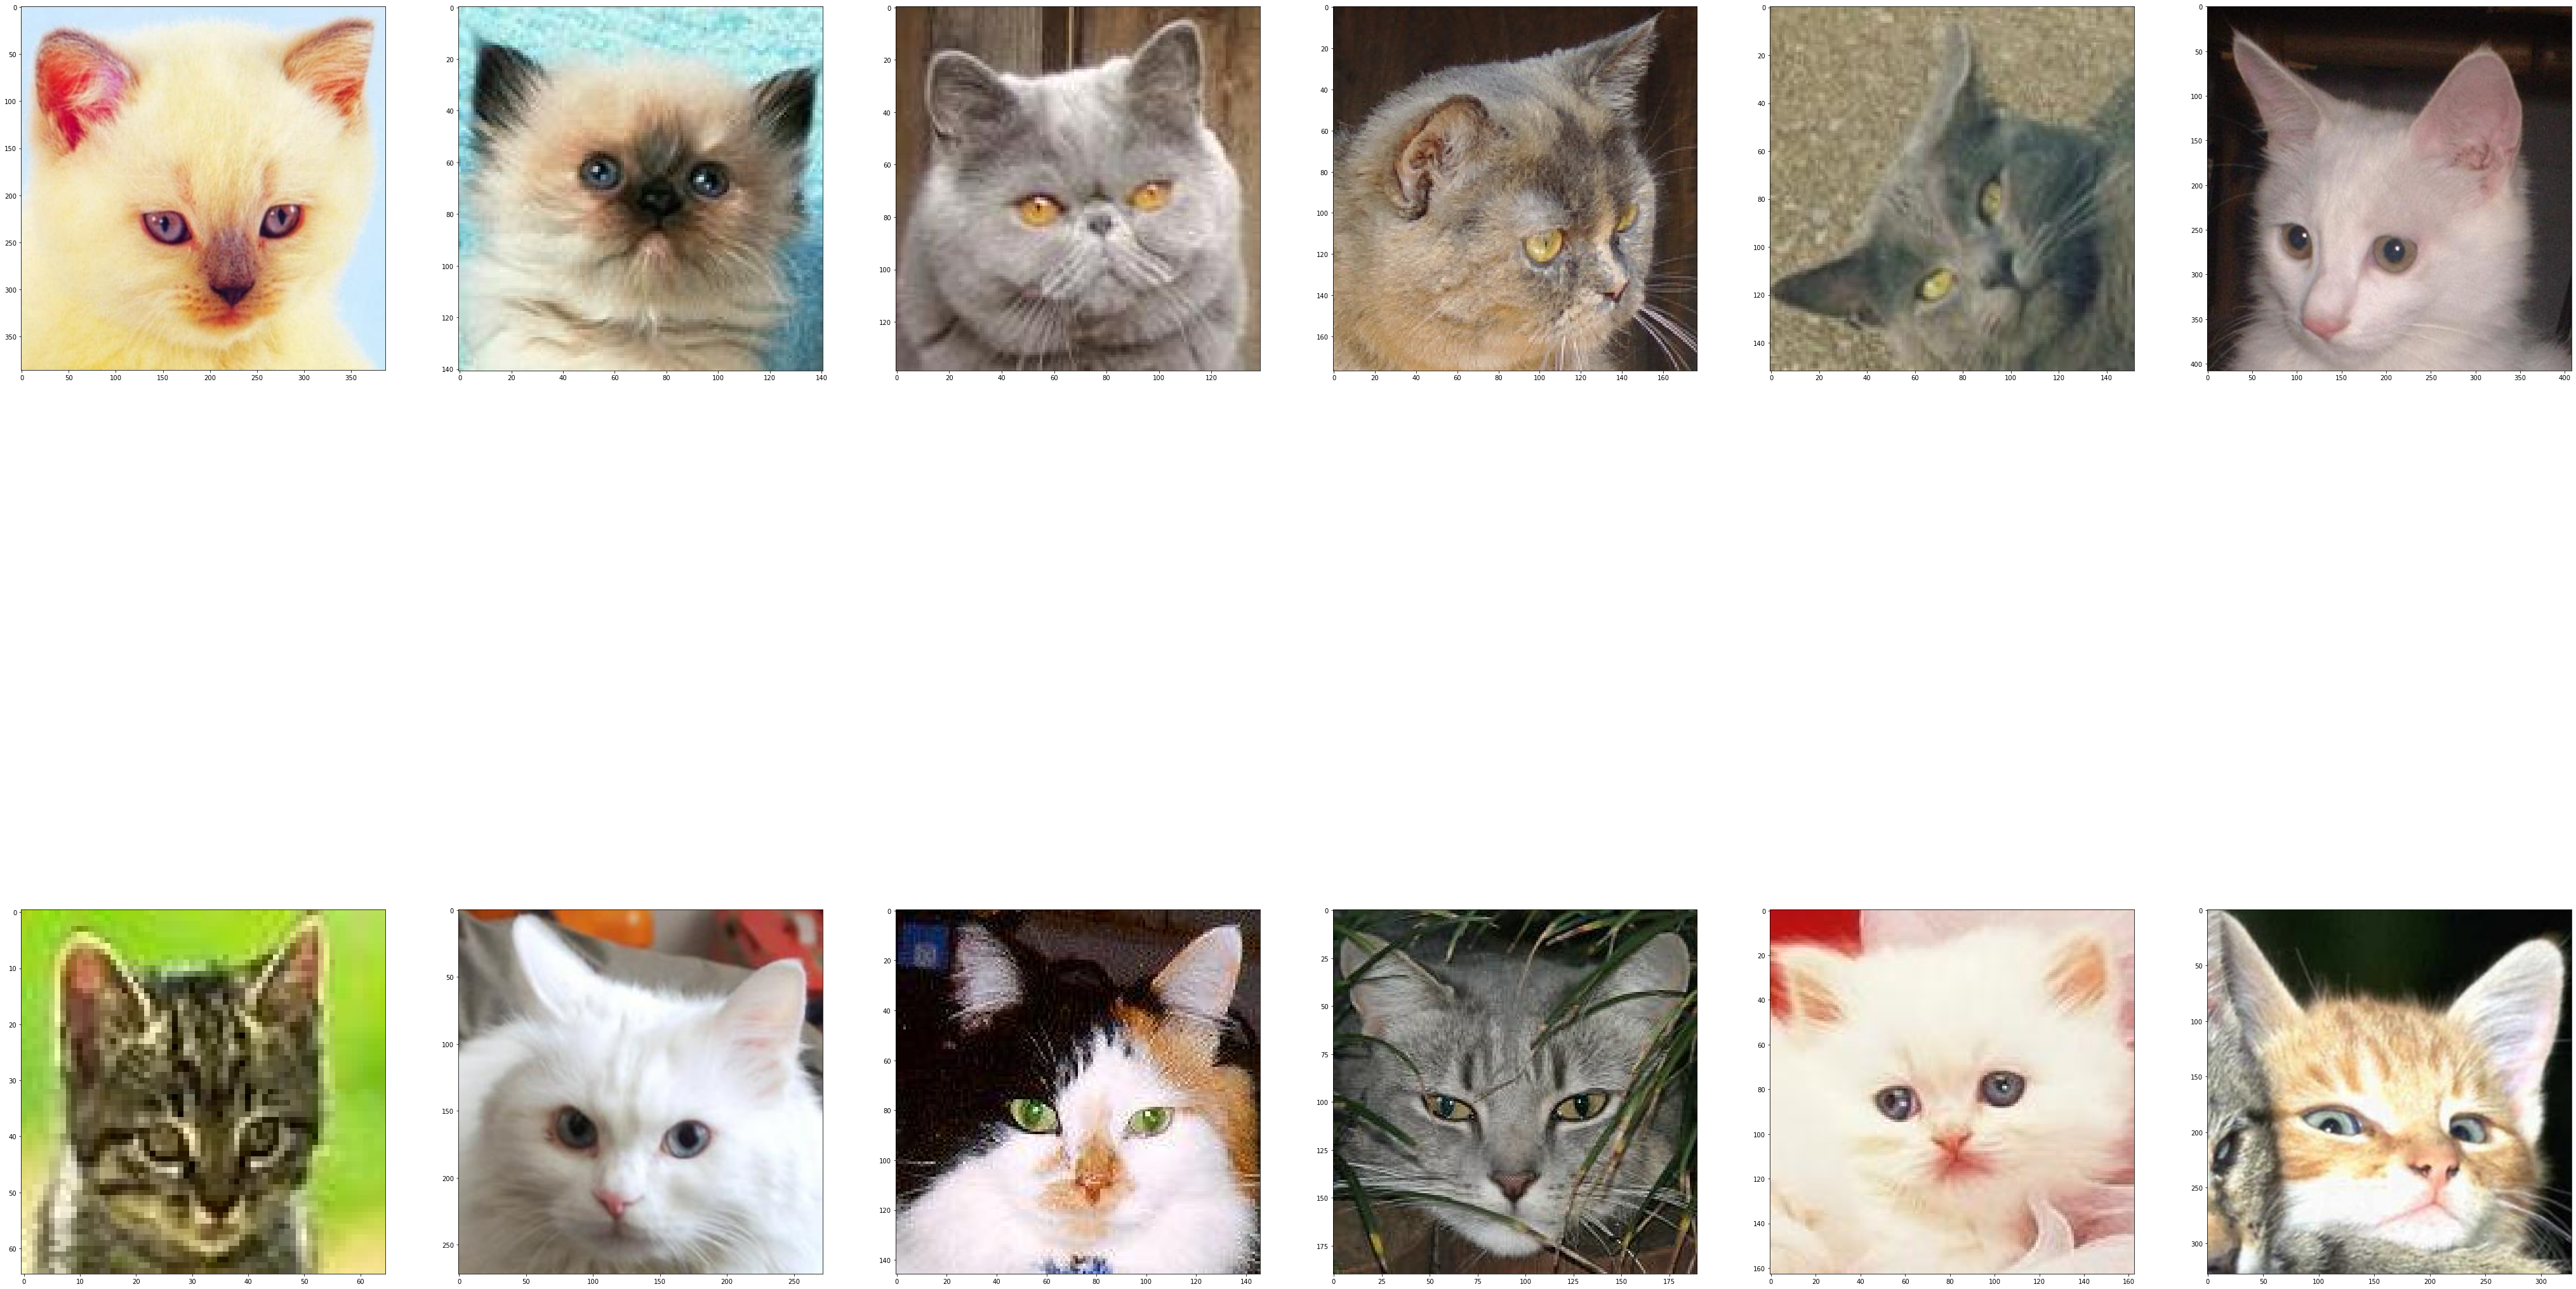

In [21]:
keys = list(hash_table['hash code'])
values  = list(hash_table['image index'])

imgs  = [mpimg.imread(os.path.join(image_dir, images[i])) for i in range(len(images)) if i in values[6]]
fig = plt.figure()
cols = 2
n_images = len(imgs)
for n, image in zip(range(n_images),imgs):
    ax = fig.add_subplot(cols,np.ceil(n_images/float(cols)),n+1)
    plt.imshow(image,cmap= 'gray')

fig.set_size_inches(np.array(fig.get_size_inches())*n_images)
plt.show()


# Search for image


In [27]:
img_list = image_conversion(".\\SearchImage")
hash_index = generate_hash_key(img_list)
print("Hash Index ", hash_index)


Hash Index  {29: [0]}
